# Logistic Regression

We would like to perform hyperparameter selection over the set of all logistic regression models.

Logistic regression with $K > 2$ classes is actually broken into two "flavours":
- **one-versus-all**: Fit a separate binary classifier for each class against the rest, and classify according to the highest score.
- **multinomial**: Fit a single classifier with $K$ outputs (one of them is 1), and take the softmax thereof. This is the flavour we learn in STAT 441, and is the default used by `sklearn`.

We choose to focus on multinomial logistic regression here.

For regularization, ElasticNet encompasses both L1 and L2 penalties (and with a weak enough regularization term, no-penalty as well).
We thus parameterize the search space by the ratio of the L1 and L2 penalties, and the coefficient C representing the extent of regularization.

Unfortunately, the only solver in `sklearn` that works with ElasticNet is the `saga` solver, and that solver is quite sluggish.

## Setup

In [1]:
from tune import (
    LogisticRegressionBayesTuner,
    outer_cv,
    Real,
)

Using 5 cores


## Bayesian Optimization

Another way to improve our density where it matters is to use Bayesian Optimization to sample over the entire continuous space.

Outer CV using 5 cores


[INFO/ForkPoolWorker-6] child process calling self.run()
[INFO/ForkPoolWorker-7] child process calling self.run()
[INFO/ForkPoolWorker-8] child process calling self.run()
[INFO/ForkPoolWorker-9] child process calling self.run()
[INFO/ForkPoolWorker-10] child process calling self.run()
/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/joblib/parallel.py:775: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/joblib/parallel.py:775: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = self._backend.configure(n_jobs=self.n_jobs, parallel=self,
/home/xujustinj/projects/pokemon-type-classification/.venv/lib/python3.10/site-packages/joblib/parallel.py:775: UserWarning: Loky-backed parallel loops cannot

<Figure size 1000x1000 with 0 Axes>

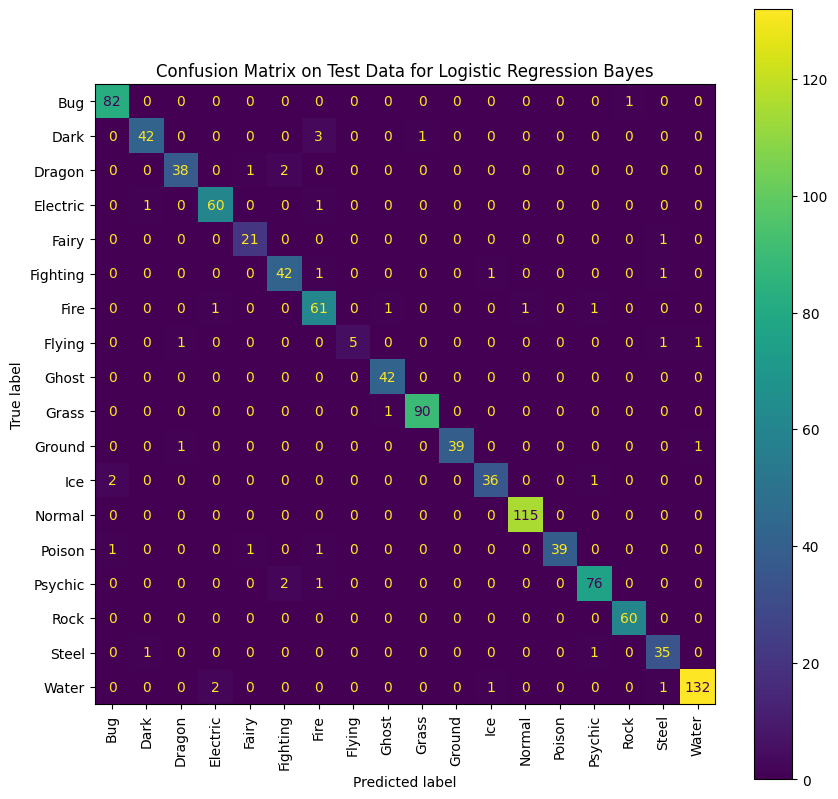

0.9630151207402392

In [3]:
tuner = LogisticRegressionBayesTuner()
space = dict(
    C=Real(low=1e-4, high=1e4, prior="log-uniform"),
    l1_ratio=Real(low=0.0, high=1.0, prior="uniform"),
)
outer_cv(tuner=tuner, search=space, name="Logistic Regression")

With 5 processes churning away at once, the worst-case performance here was about 6089 seconds to fit 251 models (a bit over 24 seconds per model). While this is slower than the single-thread performance, the combined output of all 5 processes means that we were fitting roughly one model per 5 seconds.